In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/shopping_information.csv',encoding='utf8')
data.head()

,NO,salary,educ,freq,compan,purpose,average
0,1,3,4,4,3,2,2
1,2,4,4,1,1,1,2
2,3,3,3,6,2,1,2
3,4,4,4,2,3,2,4
4,5,1,3,1,3,2,2


In [3]:
purpose_dict = {1:'enjoyment',2:'accompany lover',3:'daily articles',4:'business',5:'boring'}
average_dict = {1:'<50', 2:'[50 99]', 3:'[100 149]', 4:'[150 199]', 5:'>200'}
data.purpose.replace(purpose_dict,inplace=True)
data.average.replace(average_dict,inplace=True)

crosstab = pd.crosstab(data.purpose,data.average)
crosstab.reindex(['enjoyment','accompany lover','daily articles','business','boring'],
                 columns=['<50', '[50 99]', '[100 149]', '[150 199]', '>200'])

average,<50,[50 99],[100 149],[150 199],>200
purpose,,,,,
enjoyment,0,48,15,7,6
accompany lover,8,48,15,12,6
daily articles,1,9,10,3,2
business,1,4,9,4,4
boring,3,5,1,0,1


In [4]:
import os 
os.chdir('C:/Users/acerpc/Desktop/data_folder')
import corosana
ca=corosana.CA(crosstab)

In [5]:
print(ca.explained_variance_ratio_)

[0.51057984 0.92001143 0.96850523 1.         1.        ]


In [6]:
#R型和Q型分析的特征向量（加权后）
F = ca.F_
G = ca.G_
print(F[:,:2])

[[-0.75903754 -0.81340802]
 [ 0.22718477 -0.2089492 ]
 [ 0.38023687 -0.15354446]
 [ 0.19191092 -0.0661804 ]
 [-0.16184693  0.21001976]]


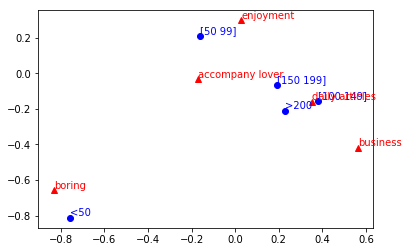

In [7]:
#绘制感知图
for i, s in enumerate(crosstab.columns):
    x, y = F[i, 0], F[i, 1]
    plt.plot(x, y, 'bo')
    plt.text(x, y, s, va='bottom', ha='left', color='b')
    
for i, s in enumerate(crosstab.index):
    x, y = G[i, 0], G[i, 1]
    plt.plot(x, y, 'r^')
    plt.text(x, y, s, va='bottom', ha='left', color='r')